## 3. Getting Started with Neural Networks

### Classifying Movie Reviews: A Binary Classification Example
In the reviews problem, we intend to classify movie reviews as positive or negative based on the text content of the reviews.

In [1]:
from keras.datasets import imdb

import numpy as np
import pandas as pd

from keras import models
from keras import layers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
##########
# Ingestion
##########
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The training data contains lists of reviews, each review is a vectorised document. Labels are 0s and 1s indicating negative and positive reviews respectively.

In [3]:
# For testing
# print([td[:15] for td in train_data[0:3]])
# print(train_labels[0:3])

For preprocessing, there are two candidate methods:
1. Pad the lists so all the lists have the same length, and then them into and integer tensor of shape (samples, word_indices) then use as the first layer in the network capable of handling such integer tensors
2. One-hot encode the list to turn the vectors into 0s and 1s. The vector size represents the vocabulary size of the corpus. 

We will use option 2.

In [4]:
##########
# Preprocessing
##########
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

A type of network that performs well for such problems is a simple stack of dense layers via relu activations. We will use 2 layers with 16 hidden units each and a third layer that outputs the scalar prediction regarding the sentiment of the review. The intermediate layers will use relu as the activation function and the final layers uses a sigmoid activation.

In [5]:
##########
# Train
##########
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Then we need to confirm the model with the optimiser and loss function

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Let's do a train_test_split for the training data

In [7]:
x_val, y_val = x_train[:10000], y_train[:10000]
partial_x_train, partial_y_train = x_train[10000:], y_train[10000:]

We now train the model for 20 epochs in mini-batches of 512 samples. We also monitor the loss and accuracy of the validation set.

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.5192 - accuracy: 0.7740 - val_loss: 0.3886 - val_accuracy: 0.8680
Epoch 2/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.3088 - accuracy: 0.9023 - val_loss: 0.3238 - val_accuracy: 0.8748
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2297 - accuracy: 0.9261 - val_loss: 0.2865 - val_accuracy: 0.8874
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1765 - accuracy: 0.9425 - val_loss: 0.2740 - val_accuracy: 0.8903
Epoch 5/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1447 - accuracy: 0.9549 - val_loss: 0.2909 - val_accuracy: 0.8855
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1180 - accuracy: 0.9640 - val_loss: 0.3022 - val_accuracy: 0.8819
Epoch 7/20
15000/15000 [==============================] - 2s 10

We can use the `history` to plot training and validation loss over each epoch.

In [9]:
history_dict = history.history
metrics_df = pd.DataFrame({'loss' : history_dict['loss'], 
                           'val_loss' : history_dict['val_loss'],
                          'accuracy' : history_dict['accuracy'],
                          'val_accuracy' : history_dict['val_accuracy']})
metrics_df['epoch'] = metrics_df.index+1

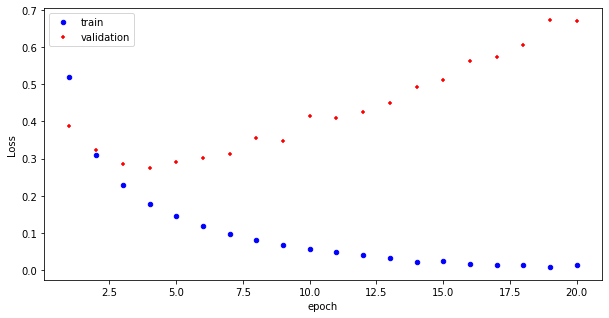

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
metrics_df.plot(kind='scatter', x='epoch', y='loss', ax=ax, label='train', color='blue')
metrics_df.plot(kind='scatter', x='epoch', y='val_loss', ax=ax, label='validation', color='red', marker='+')
ax.set_ylabel("Loss")
plt.show()

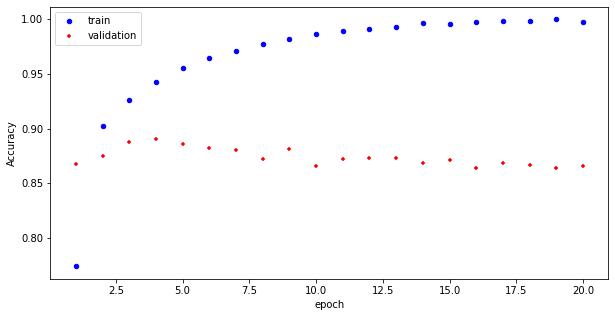

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
metrics_df.plot(kind='scatter', x='epoch', y='accuracy', ax=ax, label='train', color='blue')
metrics_df.plot(kind='scatter', x='epoch', y='val_accuracy', ax=ax, label='validation', color='red', marker='+')
ax.set_ylabel("Accuracy")
plt.show()

As you can see, training loss decreases with every epoch and training accuracy increases with every epoch. This is consistent as we use SGD. But this is not the case for valdation. They seem to be peaking at the 4th - 6th epoch. 

Hence, we can see here that the model that is trained on the training data might not directly also perform well on the validation data. This is an example of <b>overfitting</b>. So let's stop after 4 epochs.

In [12]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model2.evaluate(x_test, y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 110us/step - loss: 0.5033 - accuracy: 0.7847 - val_loss: 0.3714 - val_accuracy: 0.8687
Epoch 2/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.2940 - accuracy: 0.9036 - val_loss: 0.2977 - val_accuracy: 0.8882
Epoch 3/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.2158 - accuracy: 0.9281 - val_loss: 0.2805 - val_accuracy: 0.8867
Epoch 4/4
25000/25000 [==============================] - 3s 120us/step
[0.3043244568824768, 0.876039981842041]


In [13]:
##########
# Predict
##########
model2.predict(x_test)

array([[0.22599068],
       [0.9989202 ],
       [0.682426  ],
       ...,
       [0.08676031],
       [0.10610563],
       [0.35438138]], dtype=float32)